# Cleaning “Messy” Data

**Group members: Yifeng Lin, Yuan Zheng and Ziyang Guo**

## Introduction  
This dataset is about attributes of wines' ingredients. There are 15 attributes and 12794 observations in the dataset. This dataset is really messy. We need to check problems it has and figure out the solution to clean it.

### For the Phase I: Data Acquisition, Exploratory Data Analysis:
We have loaded the data about wines and then create a dataframe with a subset of the columns. After that, we are going to show the EDA by using seaborn and matplotlib, which enables us to use histograms and box plots to show the distributions of our data to check the missing values, outliers, and normalization.
### For the Phase II: Data Preparation, Re-Exploratory Data Analysis
we plan to replace outlirers with NAN, then use knn to impute missing values, after that, we use box cox to make some attributes' distributions more Gaussian in nature, finally re-do EDA for attributes that have been processed.

### Data summary

1. INDEX --- Unique ID
2. TARGET --- Response Variable (indicates of cases of wine sold)
3. AcidIndex --- Measures total acidity of wine via a weighted average
4. Alcohol --- Alcohol Content
5. Chlorides --- Chloride content of the wine
6. CitricAcid --- Citric Acid content of the wine
7. Density --- Density of the wine 
8. FixedAcidity --- FixedAcidity of the wine
9. FreeSulfurDioxide --- Sulfur Dioxide content of the wine
10. LabelAppeal --- Subjective marketing score that indicates the appeal of the design of the label on the bottle
11. ResidualSugar --- Residual sugar content of the wine
12. STARS --- Wine rating as determined by experts (4 = excellent; 1 = Poor）
13. Sulphates --- Sulfate content of the wine
14. TotalSulfurDioxide --- Total sulfur dioxide content of the wine
15. VolatileAcidity --- Volatile acid content of the wine
16. pH --- pH of the wine


In [1]:
# load the pandas & numpy libraries and matplotlib and seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Transfer the dataset into pandas DataFrame
df1=pd.read_csv('https://raw.githubusercontent.com/YuanZheng2828/DAV-6150/main/M3_Data.csv')
df1

,Unnamed: 0,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,0,1,3,3.2,1.160,0.98,54.2,0.567,NaN,268.0,0.99280,3.33,0.59,9.9,0,8,2.0
1,1,2,3,4.5,0.160,0.81,26.1,0.425,15.0,327.0,1.02792,3.38,0.70,NaN,-1,7,3.0
2,2,4,5,7.1,2.640,0.88,14.8,0.037,214.0,142.0,0.99518,3.12,0.48,22.0,-1,8,3.0
3,3,5,3,5.7,0.385,0.04,18.8,0.425,22.0,115.0,0.99640,2.24,1.83,6.2,-1,6,1.0
4,4,6,4,8.0,0.330,1.26,9.4,NaN,167.0,108.0,0.99457,3.12,1.77,13.7,0,9,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12790,12790,16120,0,5.0,0.790,2.01,5.0,0.043,17.0,101.0,1.01077,3.39,0.57,4.9,1,5,NaN
12791,12791,16123,5,8.9,0.470,0.29,84.9,0.259,54.0,NaN,0.99518,4.46,1.20,NaN,-1,8,2.0
12792,12792,16127,4,6.0,0.170,1.10,37.0,0.078,25.0,108.0,0.99076,3.25,NaN,12.3,0,6,2.0
12793,12793,16128,3,7.7,0.320,0.12,NaN,0.029,26.0,274.0,0.99060,3.97,0.62,11.0,-1,6,2.0


In [3]:
#checking the data type of the data
df1.dtypes

Unnamed: 0              int64
INDEX                   int64
TARGET                  int64
FixedAcidity          float64
VolatileAcidity       float64
CitricAcid            float64
ResidualSugar         float64
Chlorides             float64
FreeSulfurDioxide     float64
TotalSulfurDioxide    float64
Density               float64
pH                    float64
Sulphates             float64
Alcohol               float64
LabelAppeal             int64
AcidIndex               int64
STARS                 float64
dtype: object

The first two columns have little research value so we are going to drop them.

In [4]:
# drop uesless and meanningless data
df2=df1.copy()
df2.drop(df2.columns[[0,1]],axis=1,inplace=True) 
df2

,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,3,3.2,1.160,0.98,54.2,0.567,NaN,268.0,0.99280,3.33,0.59,9.9,0,8,2.0
1,3,4.5,0.160,0.81,26.1,0.425,15.0,327.0,1.02792,3.38,0.70,NaN,-1,7,3.0
2,5,7.1,2.640,0.88,14.8,0.037,214.0,142.0,0.99518,3.12,0.48,22.0,-1,8,3.0
3,3,5.7,0.385,0.04,18.8,0.425,22.0,115.0,0.99640,2.24,1.83,6.2,-1,6,1.0
4,4,8.0,0.330,1.26,9.4,NaN,167.0,108.0,0.99457,3.12,1.77,13.7,0,9,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12790,0,5.0,0.790,2.01,5.0,0.043,17.0,101.0,1.01077,3.39,0.57,4.9,1,5,NaN
12791,5,8.9,0.470,0.29,84.9,0.259,54.0,NaN,0.99518,4.46,1.20,NaN,-1,8,2.0
12792,4,6.0,0.170,1.10,37.0,0.078,25.0,108.0,0.99076,3.25,NaN,12.3,0,6,2.0
12793,3,7.7,0.320,0.12,NaN,0.029,26.0,274.0,0.99060,3.97,0.62,11.0,-1,6,2.0


In [5]:
# checking the length of the modified data
len(df2)

12795

The Acidity of the wine and the ResidualSugar should be more than 0, the case of acidity or sugar equals 0 can be seen as the fake wine or wine with quality problems. As for the chlorides, sulfurDioxide sulphates and alcohol, we all need to make sure that they are all above 0. The wine's PH should be above 2, otherwise, it can be too sour for people to drink. Above all, in order to do more scientific research, we are going to drop these data, which will also help us to clean data and get the precise outcome.


In [6]:
# Drop observations with "0" values in continuous attributes
df2=df2.drop(df2[(df2.CitricAcid==0)|
                 (df2.VolatileAcidity==0)|
                 (df2.FixedAcidity==0)|
                 (df2.FreeSulfurDioxide==0)|
                 (df2.TotalSulfurDioxide==0)|
                 (df2.ResidualSugar==0)|
                 (df2.Sulphates==0)|
                 (df2.Alcohol==0)|
                 (df2.Chlorides==0)|
                 (df2.pH<=2)].index)
df2

,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,3,3.2,1.160,0.98,54.2,0.567,NaN,268.0,0.99280,3.33,0.59,9.9,0,8,2.0
1,3,4.5,0.160,0.81,26.1,0.425,15.0,327.0,1.02792,3.38,0.70,NaN,-1,7,3.0
2,5,7.1,2.640,0.88,14.8,0.037,214.0,142.0,0.99518,3.12,0.48,22.0,-1,8,3.0
3,3,5.7,0.385,0.04,18.8,0.425,22.0,115.0,0.99640,2.24,1.83,6.2,-1,6,1.0
4,4,8.0,0.330,1.26,9.4,NaN,167.0,108.0,0.99457,3.12,1.77,13.7,0,9,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12790,0,5.0,0.790,2.01,5.0,0.043,17.0,101.0,1.01077,3.39,0.57,4.9,1,5,NaN
12791,5,8.9,0.470,0.29,84.9,0.259,54.0,NaN,0.99518,4.46,1.20,NaN,-1,8,2.0
12792,4,6.0,0.170,1.10,37.0,0.078,25.0,108.0,0.99076,3.25,NaN,12.3,0,6,2.0
12793,3,7.7,0.320,0.12,NaN,0.029,26.0,274.0,0.99060,3.97,0.62,11.0,-1,6,2.0


In [7]:
#check the length of the data
len(df2)

12078

We have dropped nearly 717 rows of data to make whole dataset more scientific to do further work.

In [8]:
# check null values
df2.isnull().sum()

TARGET                   0
FixedAcidity             0
VolatileAcidity          0
CitricAcid               0
ResidualSugar          593
Chlorides              601
FreeSulfurDioxide      607
TotalSulfurDioxide     640
Density                  0
pH                     388
Sulphates             1146
Alcohol                621
LabelAppeal              0
AcidIndex                0
STARS                 3163
dtype: int64

According to the above chart, we can know the number of missing values of each column, because the number of NAN is too big to drop directly, so we are ready to use KNN to fill in missing values. The columns we are going to fill are 'ResidualSugar', 'Chlorides ', 'FreeSulfurDioxide', 'TotalSulfurDioxide', 'pH', 'Sulphates', 'Alcohol' and 'STARS'.

## Exploratory Data Analysis (EDA)

Summary statistics for each attribute and appropriate graphical analysis for each attributes using Seaborn and Matplotlib.

In [9]:
# statistical calculations of each attributes in the datset.
df2.describe()

,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
count,12078.000000,12078.000000,12078.000000,12078.000000,11485.000000,11477.000000,11471.000000,11438.000000,12078.000000,11690.000000,10932.000000,11457.000000,12078.000000,12078.000000,8915.00000
mean,3.039245,8.074019,0.642073,0.692967,23.407492,0.222853,106.806338,205.562817,0.994201,3.273506,0.848527,10.500005,-0.009107,7.768919,2.04184
std,1.928364,4.988507,0.555503,0.606886,24.909688,0.234080,108.038273,163.757660,0.026512,0.602879,0.655481,3.620286,0.892917,1.323730,0.90330
min,0.000000,0.100000,0.005000,0.010000,0.100000,0.001000,1.000000,1.000000,0.888090,2.010000,0.010000,0.100000,-2.000000,4.000000,1.00000
25%,2.000000,5.600000,0.250000,0.290000,3.700000,0.046000,28.000000,100.000000,0.987745,3.010000,0.430000,9.000000,-1.000000,7.000000,1.00000
50%,3.000000,7.000000,0.410000,0.440000,12.900000,0.099000,56.000000,155.000000,0.994490,3.210000,0.590000,10.400000,0.000000,8.000000,2.00000
75%,4.000000,9.800000,0.910000,0.980000,38.700000,0.369000,171.000000,264.000000,1.000550,3.490000,1.100000,12.300000,1.000000,8.000000,3.00000
max,8.000000,34.400000,3.680000,3.860000,141.150000,1.351000,623.000000,1057.000000,1.099240,6.130000,4.240000,26.500000,2.000000,17.000000,4.00000


In [10]:
columns=df2.columns.to_list()

In [11]:
columns

['TARGET',
 'FixedAcidity',
 'VolatileAcidity',
 'CitricAcid',
 'ResidualSugar',
 'Chlorides',
 'FreeSulfurDioxide',
 'TotalSulfurDioxide',
 'Density',
 'pH',
 'Sulphates',
 'Alcohol',
 'LabelAppeal',
 'AcidIndex',
 'STARS']

In [12]:
# set plot type
plt.style.use('ggplot')

C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\asus\anaconda3\lib\site-p

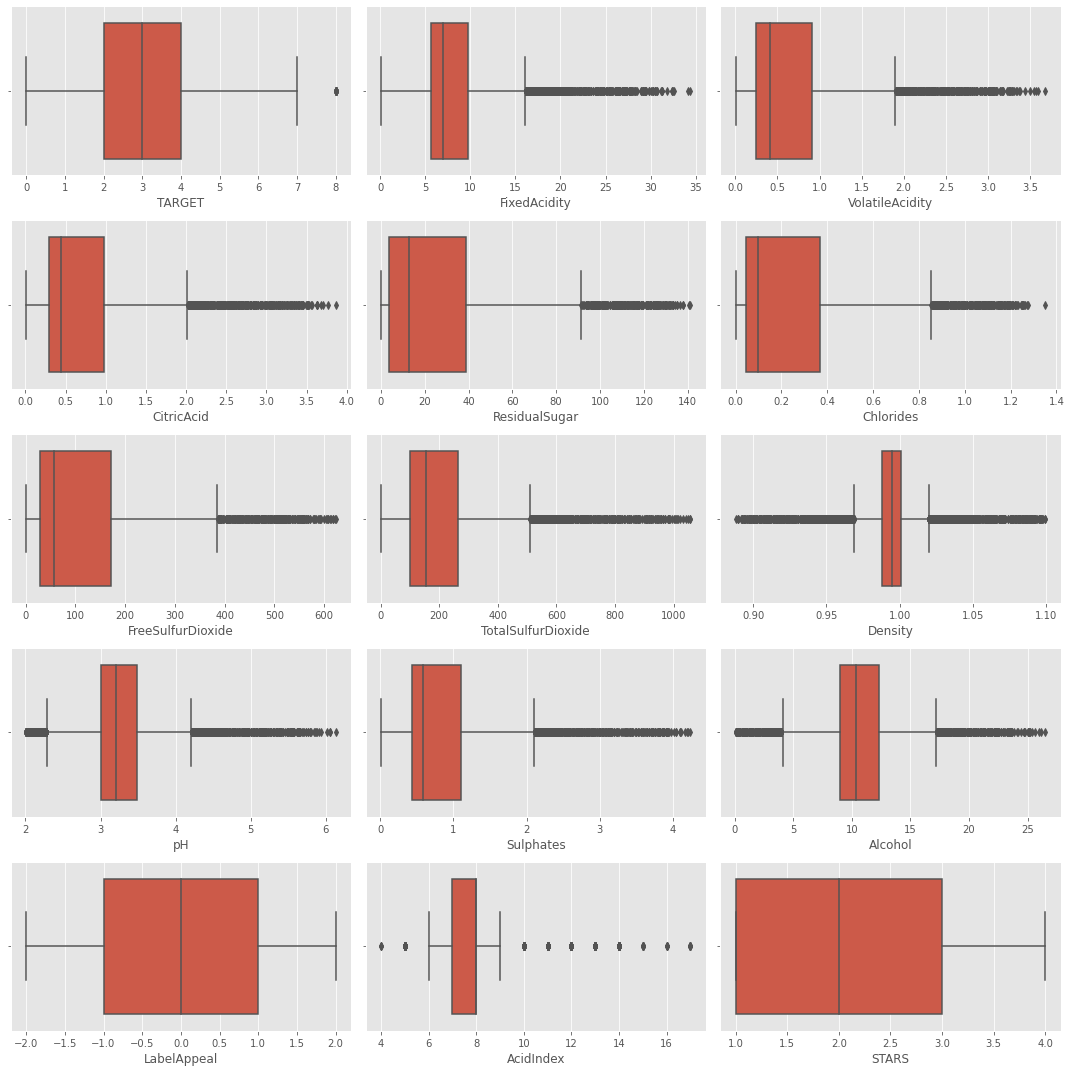

In [13]:
# boxplot visualization of each attribute
fig=plt.figure(figsize=(15,15))
for i in range(15):
    plt.subplot(5,3,i+1)
    sns.boxplot(df2[columns[i]])
    
plt.tight_layout()

According to the above fifteen box charts, we can find that except for the  'STARS', 'Acidlndex', 'LabelAppeal' and 'TARGET' these four charts, other charts have some outliers more or less. Such as the chart of 'Fixed Acidty', its mean value is 8.06 and many outliers here are larger than 20. As for the charts like 'Density', 'pH' and 'Alcohol', there are some outliers that are lower than the lower edge value. So we are going to replace them with NAN and impute them by using KNN to deal with them.

In [14]:
# set plot type
plt.style.use('fast')

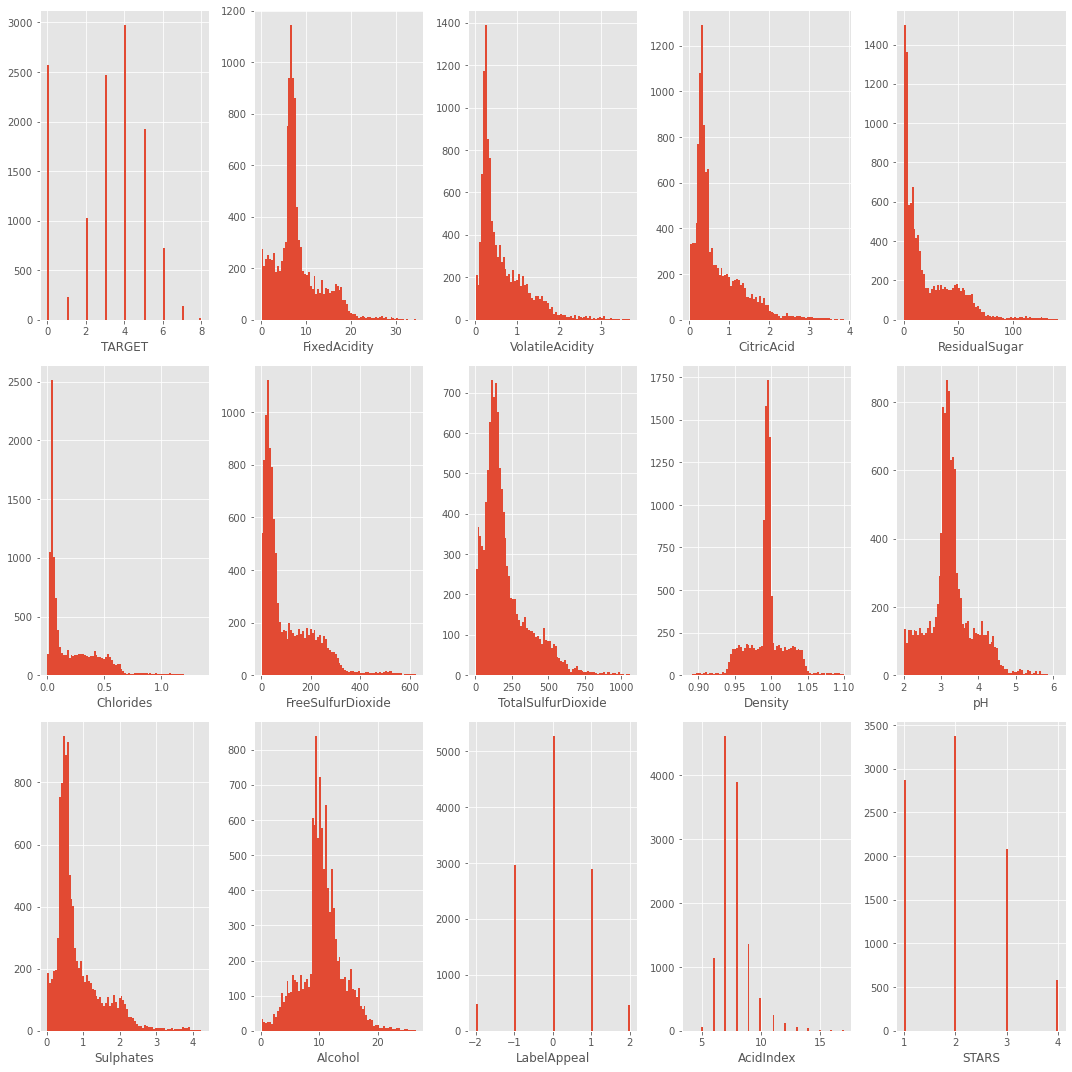

In [15]:
# histplot visualization of each attribute
fig=plt.figure(figsize=(15,15))
for i in range(15):
    plt.subplot(3,5,i+1)
    df2[columns[i]].hist(bins=80)
    plt.xlabel(columns[i])
plt.tight_layout()

According to the above fifteen histograms, we can find that there are some charts like 'Density', 'pH' and 'Alcohol' conform to the normal distribution. Then, we got the results from 'TARGET', 'LabelAppeal', 'AcidIndex', and 'STARS' these four charts that these attributes are discrete. The remaining charts' distribution can be seen as normal distribution, but we need to do more like imputing missing values and handling outliers in the next part. 

In view of the four discrete variables, we are ready to use bar charts to present more details

<AxesSubplot:title={'center':'Freq Dist of TARGET'}, xlabel='TARGET', ylabel='Count'>

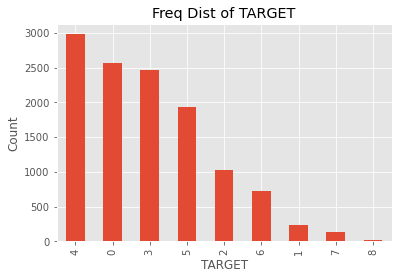

In [16]:
# freqency disribution of TARGET attribute
bplt1 = df2['TARGET'].value_counts().plot.bar(title = "Freq Dist of TARGET")
plt.xlabel('TARGET')
plt.ylabel('Count')
bplt1

The TARGET means the cases of wine sold, so we can see from the bar chart that the first three common cases are four, zero, and three, and the case of eight is nearly hard to see.

<AxesSubplot:title={'center':'Freq Dist of LabelAppeal'}, xlabel='LabelAppeal', ylabel='Count'>

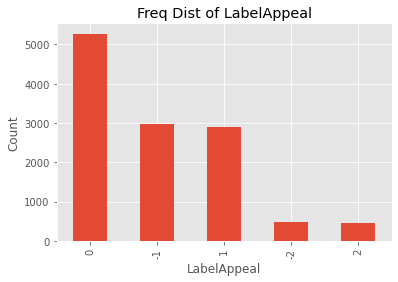

In [17]:
# freqency disribution of LabelAppeal attribute
bplt2 = df2['LabelAppeal'].value_counts().plot.bar(title = "Freq Dist of LabelAppeal")
plt.xlabel('LabelAppeal')
plt.ylabel('Count')
bplt2

The LabelAppeal means the subjective marketing score that indicates the appeal of the design of the label on the bottle, it seems like the most customer feels nothing about the label on the wines' bottle. And the number of people who like the design of the label is nearly same as the number of the person who doesn't.

<AxesSubplot:title={'center':'AcidIndex'}, xlabel='AcidIndex', ylabel='Count'>

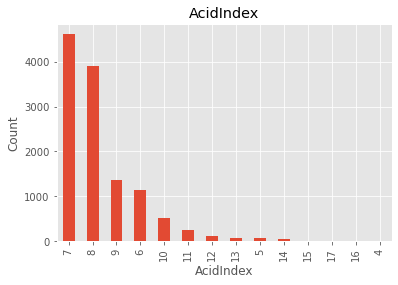

In [18]:
# freqency disribution of AcidIndex attribute
bplt3 = df2['AcidIndex'].value_counts().plot.bar(title = "AcidIndex")
plt.xlabel('AcidIndex')
plt.ylabel('Count')
bplt3

The Acidindex means fixedAcidity of the wine, the acidindex of most wine gathers at the rank of 7 and 8. And the level of 9 and 6 is locating at the second echelon, the level of 10, 11, and 12 is at the third echelon, the other levels like 5, 13 are significantly less than other levels.

<AxesSubplot:title={'center':'Freq Dist of STARS'}, xlabel='STARS', ylabel='Count'>

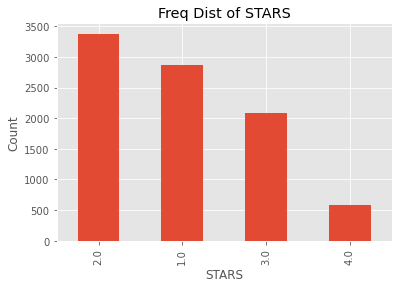

In [19]:
# freqency disribution of STARS attribute
bplt4 = df2['STARS'].value_counts().plot.bar(title = "Freq Dist of STARS")
plt.xlabel('STARS')
plt.ylabel('Count')
bplt4

The STARS means the rating of wine as determined by experts (4 = excellent; 1 = Poor). According to this bar chart, we can find that the most level of wine gather at the level of 2 and 1, which means the low-quality wine occupies a large part here. And with the increase in wine quality, the corresponding quantity is also decreasing.

In [20]:
#check correlation between each attributes
df2.corr()

,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
TARGET,1.000000,-0.054918,-0.068609,0.008134,0.006766,-0.029173,0.024800,0.033960,-0.035068,-0.008115,-0.034162,0.067825,0.359284,-0.247322,0.560719
FixedAcidity,-0.054918,1.000000,0.008808,-0.003184,0.006135,0.003059,0.000850,-0.014499,0.000443,0.004825,0.020307,-0.007014,-0.005421,0.180864,-0.018449
VolatileAcidity,-0.068609,0.008808,1.000000,-0.000260,0.005649,0.007717,-0.011801,-0.033137,-0.004964,0.013042,0.003895,0.015307,-0.016653,0.036836,-0.030575
CitricAcid,0.008134,-0.003184,-0.000260,1.000000,-0.018481,0.000382,0.002918,0.008958,-0.014622,0.004409,0.017542,-0.007855,0.018827,0.035640,0.001044
ResidualSugar,0.006766,0.006135,0.005649,-0.018481,1.000000,-0.003741,-0.008979,0.013702,-0.003090,-0.003596,-0.009106,-0.008872,0.004893,-0.014080,0.010001
Chlorides,-0.029173,0.003059,0.007717,0.000382,-0.003741,1.000000,-0.005361,-0.011904,0.018120,0.006326,0.024412,-0.000074,-0.008457,0.030500,-0.002527
FreeSulfurDioxide,0.024800,0.000850,-0.011801,0.002918,-0.008979,-0.005361,1.000000,0.017747,0.004497,-0.002548,-0.001269,-0.010214,0.009704,-0.023665,0.000105
TotalSulfurDioxide,0.033960,-0.014499,-0.033137,0.008958,0.013702,-0.011904,0.017747,1.000000,0.014427,-0.000622,-0.012971,-0.037021,-0.015285,-0.036787,-0.003170
Density,-0.035068,0.000443,-0.004964,-0.014622,-0.003090,0.018120,0.004497,0.014427,1.000000,0.007951,0.013103,-0.012479,-0.008360,0.042692,-0.017492
pH,-0.008115,0.004825,0.013042,0.004409,-0.003596,0.006326,-0.002548,-0.000622,0.007951,1.000000,0.010096,-0.006032,0.001834,-0.054342,0.005025


According to the above chart, we know that there is nearly no obvious correlation between most variables, except for the relationship between STARS and TARGET, the value of correlation is 0.56.

## Data Preparation

According to the data, we can see except for the 'Density', 'pH' and 'Alcohol' are normal distributed, other attributes are not normal distributed which means can't fit ML or regression models. So we need to use boxcox function to modify the data to deal with the outliers in the dataset. Before that, we need to deal with outliers and missing values in the dataset.

### Outliers

In [27]:
#based on the 2.5 times deivation to remove outliers
df2['FixedAcidity'][np.abs(df2['FixedAcidity'] - df2['FixedAcidity'].mean() ) > (2.5 * df2['FixedAcidity'].std() )] = np.nan

<ipython-input-27-f87944d3be49>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['FixedAcidity'][np.abs(df2['FixedAcidity'] - df2['FixedAcidity'].mean() ) > (2.5 * df2['FixedAcidity'].std() )] = np.nan


In [29]:
#based on the 2.5 times deivation to remove outliers
df2['VolatileAcidity'][np.abs(df2['VolatileAcidity'] - df2['VolatileAcidity'].mean() ) > (2.5 * df2['VolatileAcidity'].std() )] = np.nan

<ipython-input-29-e79b145844af>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['VolatileAcidity'][np.abs(df2['VolatileAcidity'] - df2['VolatileAcidity'].mean() ) > (2.5 * df2['VolatileAcidity'].std() )] = np.nan


In [30]:
#based on the 2.5 times deivation to remove outliers
df2['CitricAcid'][np.abs(df2['CitricAcid'] - df2['CitricAcid'].mean() ) > (2.5 * df2['CitricAcid'].std() )] = np.nan

<ipython-input-30-20b1ec8fc8bd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['CitricAcid'][np.abs(df2['CitricAcid'] - df2['CitricAcid'].mean() ) > (2.5 * df2['CitricAcid'].std() )] = np.nan


In [31]:
#based on the 2.5 times deivation to remove outliers
df2['ResidualSugar'][np.abs(df2['ResidualSugar'] - df2['ResidualSugar'].mean() ) > (2.5 * df2['ResidualSugar'].std() )] = np.nan

<ipython-input-31-75aaa7b6bdfe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['ResidualSugar'][np.abs(df2['ResidualSugar'] - df2['ResidualSugar'].mean() ) > (2.5 * df2['ResidualSugar'].std() )] = np.nan


In [32]:
#based on the 2.5 times deivation to remove outliers
df2['Chlorides'][np.abs(df2['Chlorides'] - df2['Chlorides'].mean() ) > (2.5 * df2['Chlorides'].std() )] = np.nan

<ipython-input-32-1527873bf458>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Chlorides'][np.abs(df2['Chlorides'] - df2['Chlorides'].mean() ) > (2.5 * df2['Chlorides'].std() )] = np.nan


In [33]:
#based on the 2.5 times deivation to remove outliers
df2['FreeSulfurDioxide'][np.abs(df2['FreeSulfurDioxide'] - df2['FreeSulfurDioxide'].mean() ) > (2.5 * df2['FreeSulfurDioxide'].std() )] = np.nan

<ipython-input-33-7592381cdfef>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['FreeSulfurDioxide'][np.abs(df2['FreeSulfurDioxide'] - df2['FreeSulfurDioxide'].mean() ) > (2.5 * df2['FreeSulfurDioxide'].std() )] = np.nan


In [34]:
#based on the 2.5 times deivation to remove outliers
df2['TotalSulfurDioxide'][np.abs(df2['TotalSulfurDioxide'] - df2['TotalSulfurDioxide'].mean() ) > (2.5 * df2['TotalSulfurDioxide'].std() )] = np.nan

<ipython-input-34-4e6d9c900177>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['TotalSulfurDioxide'][np.abs(df2['TotalSulfurDioxide'] - df2['TotalSulfurDioxide'].mean() ) > (2.5 * df2['TotalSulfurDioxide'].std() )] = np.nan


In [35]:
#based on the 2.5 times deivation to remove outliers
df2['Density'][np.abs(df2['Density'] - df2['Density'].mean() ) > (2.5 * df2['Density'].std() )] = np.nan

<ipython-input-35-bdb5d6c2b102>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Density'][np.abs(df2['Density'] - df2['Density'].mean() ) > (2.5 * df2['Density'].std() )] = np.nan


In [36]:
#based on the 2.5 times deivation to remove outliers
df2['pH'][np.abs(df2['pH'] - df2['pH'].mean() ) > (2.5 * df2['pH'].std() )] = np.nan

<ipython-input-36-b7ba04a8c220>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['pH'][np.abs(df2['pH'] - df2['pH'].mean() ) > (2.5 * df2['pH'].std() )] = np.nan


In [37]:
#based on the 2.5 times deivation to remove outliers
df2['Sulphates'][np.abs(df2['Sulphates'] - df2['Sulphates'].mean() ) > (2.5 * df2['Sulphates'].std() )] = np.nan

<ipython-input-37-dfd4c0dd9374>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Sulphates'][np.abs(df2['Sulphates'] - df2['Sulphates'].mean() ) > (2.5 * df2['Sulphates'].std() )] = np.nan


In [38]:
#based on the 2.5 times deivation to remove outliers
df2['Alcohol'][np.abs(df2['Alcohol'] - df2['Alcohol'].mean() ) > (2.5 * df2['Alcohol'].std() )] = np.nan

<ipython-input-38-a6771cb1761a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Alcohol'][np.abs(df2['Alcohol'] - df2['Alcohol'].mean() ) > (2.5 * df2['Alcohol'].std() )] = np.nan


### Missing values

In [39]:
# check the data for null values
df2.isnull().sum()

TARGET                   0
FixedAcidity           231
VolatileAcidity        326
CitricAcid             325
ResidualSugar          882
Chlorides              926
FreeSulfurDioxide      908
TotalSulfurDioxide     939
Density                325
pH                     579
Sulphates             1412
Alcohol                870
LabelAppeal              0
AcidIndex                0
STARS                 3163
dtype: int64

In [40]:
# load KNNImputer from sklearn.impute
from sklearn.impute import KNNImputer
# use KNN to fill missing values
KI = KNNImputer(n_neighbors = 3, weights = "uniform")
df2_transformed = KI.fit_transform(df2)
print(df2_transformed)

[[ 3.          3.2         1.16       ...  0.          8.
   2.        ]
 [ 3.          4.5         0.16       ... -1.          7.
   3.        ]
 [ 5.          7.1         0.46333333 ... -1.          8.
   3.        ]
 ...
 [ 4.          6.          0.17       ...  0.          6.
   2.        ]
 [ 3.          7.7         0.32       ... -1.          6.
   2.        ]
 [ 4.          5.2         0.04       ...  0.          7.
   2.        ]]


In [41]:
# covert to dataframe
df3 = pd.DataFrame(df2_transformed) 

In [42]:
# adding new dataframe headers
df3.columns = ['TARGET', 'FixedAcidity','VolatileAcidity', 'CitricAcid', 'ResidualSugar', 'Chlorides', 'FreeSulfurDioxide', 'TotalSulfurDioxide', 'Density', 'pH', 'Sulphates', 'Alcohol', 'LabelAppeal', 'AcidIndex', 'STARS']

In [43]:
df3

,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,3.0,3.2,1.160000,0.98,54.2,0.567000,114.333333,268.000000,0.99280,3.33,0.590000,9.900000,0.0,8.0,2.000000
1,3.0,4.5,0.160000,0.81,26.1,0.425000,15.000000,327.000000,1.02792,3.38,0.700000,14.400000,-1.0,7.0,3.000000
2,5.0,7.1,0.463333,0.88,14.8,0.037000,214.000000,142.000000,0.99518,3.12,0.480000,11.200000,-1.0,8.0,3.000000
3,3.0,5.7,0.385000,0.04,18.8,0.425000,22.000000,115.000000,0.99640,2.24,1.830000,6.200000,-1.0,6.0,1.000000
4,4.0,8.0,0.330000,1.26,9.4,0.076667,167.000000,108.000000,0.99457,3.12,1.770000,13.700000,0.0,9.0,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12073,0.0,5.0,0.790000,2.01,5.0,0.043000,17.000000,101.000000,1.01077,3.39,0.570000,4.900000,1.0,5.0,1.333333
12074,5.0,8.9,0.470000,0.29,84.9,0.259000,54.000000,293.166667,0.99518,4.46,1.200000,8.933333,-1.0,8.0,2.000000
12075,4.0,6.0,0.170000,1.10,37.0,0.078000,25.000000,108.000000,0.99076,3.25,0.653333,12.300000,0.0,6.0,2.000000
12076,3.0,7.7,0.320000,0.12,23.1,0.029000,26.000000,274.000000,0.99060,3.97,0.620000,11.000000,-1.0,6.0,2.000000


In [44]:
# We found that some values in the 'STARS' column are not integers, so we use round function to round the 'STARS' column
df3['STARS'] = round(df3['STARS'])

In [45]:
# check the data for null values
df3.isnull().sum()

TARGET                0
FixedAcidity          0
VolatileAcidity       0
CitricAcid            0
ResidualSugar         0
Chlorides             0
FreeSulfurDioxide     0
TotalSulfurDioxide    0
Density               0
pH                    0
Sulphates             0
Alcohol               0
LabelAppeal           0
AcidIndex             0
STARS                 0
dtype: int64

### Normalizations  
For normalization of this dataset, we use boxcox to deal with dependent and non-discrete attributes.
Other varibles are categorical attributes, so we decide not to change its probability density functions.

In [46]:
# Load boxcox function from scipy.stats
from scipy.stats import boxcox
from scipy import stats

#### FixedAcidity

In [47]:
# using boxcox to deal with some outliers and finish normalization
x1 = df3.FixedAcidity
y1, fixed_x1 = stats.boxcox(x1)
df3['FixedAcidity'] = pd.DataFrame(y1)

#### VolatileAcidity

In [48]:
# using boxcox to deal with some outliers and finish normalization
x2 = df3.VolatileAcidity
y2, fixed_x2 = stats.boxcox(x2)
df3['VolatileAcidity'] = pd.DataFrame(y2)

#### CitricAcid

In [49]:
# using boxcox to deal with some outliers and finish normalization
x3 = df3.CitricAcid
y3, fixed_x3 = stats.boxcox(x3)
df3['CitricAcid'] = pd.DataFrame(y3)

#### ResidualSugar

In [50]:
# using boxcox to deal with some outliers and finish normalization
x4 = df3.ResidualSugar
y4, fixed_x4 = stats.boxcox(x4)
df3['ResidualSugar'] = pd.DataFrame(y4)

#### Chlorides

In [51]:
# using boxcox to deal with some outliers and finish normalization
x5 = df3.Chlorides
y5, fixed_x5 = stats.boxcox(x5)
df3['Chlorides'] = pd.DataFrame(y5)

#### FreeSulfurDioxide

In [52]:
# using boxcox to deal with some outliers and finish normalization
x6 = df3.FreeSulfurDioxide
y6, fixed_x6 = stats.boxcox(x6)
df3['FreeSulfurDioxide'] = pd.DataFrame(y6)

#### TotalSulfurDioxide

In [53]:
# using boxcox to deal with some outliers and finish normalization
x7 = df3.TotalSulfurDioxide
y7, fixed_x7 = stats.boxcox(x7)
df3['TotalSulfurDioxide'] = pd.DataFrame(y7)

#### Sulphates

In [54]:
# using boxcox to deal with some outliers and finish normalization
x8 = df3.Sulphates
y8, fixed_x8 = stats.boxcox(x8)
df3['Sulphates'] = pd.DataFrame(y8)

In [55]:
# checking the data preparation result
df3.round(2)

,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,3.0,1.67,0.15,-0.02,5.69,-0.56,7.23,18.65,0.99,3.33,-0.49,9.90,0.0,8.0,2.0
1,3.0,2.42,-1.54,-0.20,4.35,-0.84,3.43,20.28,1.03,3.38,-0.34,14.40,-1.0,7.0,3.0
2,5.0,3.69,-0.72,-0.13,3.41,-3.11,8.69,14.18,1.00,3.12,-0.65,11.20,-1.0,8.0,3.0
3,3.0,3.04,-0.87,-2.17,3.79,-0.84,4.05,12.92,1.00,2.24,0.67,6.20,-1.0,6.0,1.0
4,4.0,4.09,-1.00,0.24,2.72,-2.46,8.10,12.56,0.99,3.12,0.63,13.70,0.0,9.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12073,0.0,2.69,-0.23,0.77,1.85,-2.98,3.63,12.19,1.01,3.39,-0.51,4.90,1.0,5.0,1.0
12074,5.0,4.46,-0.70,-1.06,6.60,-1.32,5.67,19.37,1.00,4.46,0.19,8.93,-1.0,8.0,2.0
12075,4.0,3.18,-1.50,0.10,4.97,-2.44,4.27,12.56,0.99,3.25,-0.40,12.30,0.0,6.0,2.0
12076,3.0,3.96,-1.02,-1.63,4.14,-3.33,4.33,18.83,0.99,3.97,-0.44,11.00,-1.0,6.0,2.0


## Re-Exploratory Data Analysis (Re-EDA)

Summary statistics for attributes that have been processed above and appropriate graphical analysis for attributes that have been processed above using Seaborn and Matplotlib.

In [56]:
# statistical calculations of each attributes in the datset.
df3.describe()

,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
count,12078.000000,12078.000000,12078.000000,12078.000000,12078.000000,12078.000000,12078.000000,12078.000000,12078.000000,12078.000000,12078.000000,12078.000000,12078.000000,12078.000000,12078.000000
mean,3.039245,3.730366,-0.716082,-0.624298,3.171841,-2.042774,6.061699,15.002452,0.994197,3.246544,-0.346922,10.473767,-0.009107,7.768919,1.989237
std,1.928364,1.952154,0.697044,0.698734,1.883532,1.004212,2.104634,4.913337,0.022620,0.540332,0.605565,3.214290,0.892917,1.323730,0.817270
min,0.000000,-1.259053,-3.320170,-2.670405,-1.908987,-6.135237,0.000000,0.000000,0.928090,2.010000,-2.394731,1.500000,-2.000000,4.000000,1.000000
25%,2.000000,2.939670,-1.216592,-1.081878,1.561305,-2.918808,4.523243,12.186824,0.988383,3.010000,-0.721028,9.000000,-1.000000,7.000000,1.000000
50%,3.000000,3.637198,-0.819218,-0.738435,3.195528,-2.193861,5.780587,14.657050,0.994450,3.210000,-0.456811,10.400000,0.000000,8.000000,2.000000
75%,4.000000,4.663821,-0.160001,-0.082474,4.866683,-1.090321,7.938670,17.964233,1.000100,3.480000,0.049177,12.200000,1.000000,8.000000,2.000000
max,8.000000,8.379219,0.758604,0.881699,6.619611,-0.213628,10.139209,26.317358,1.060470,4.780000,1.055735,19.500000,2.000000,17.000000,4.000000


C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\asus\anaconda3\lib\site-p

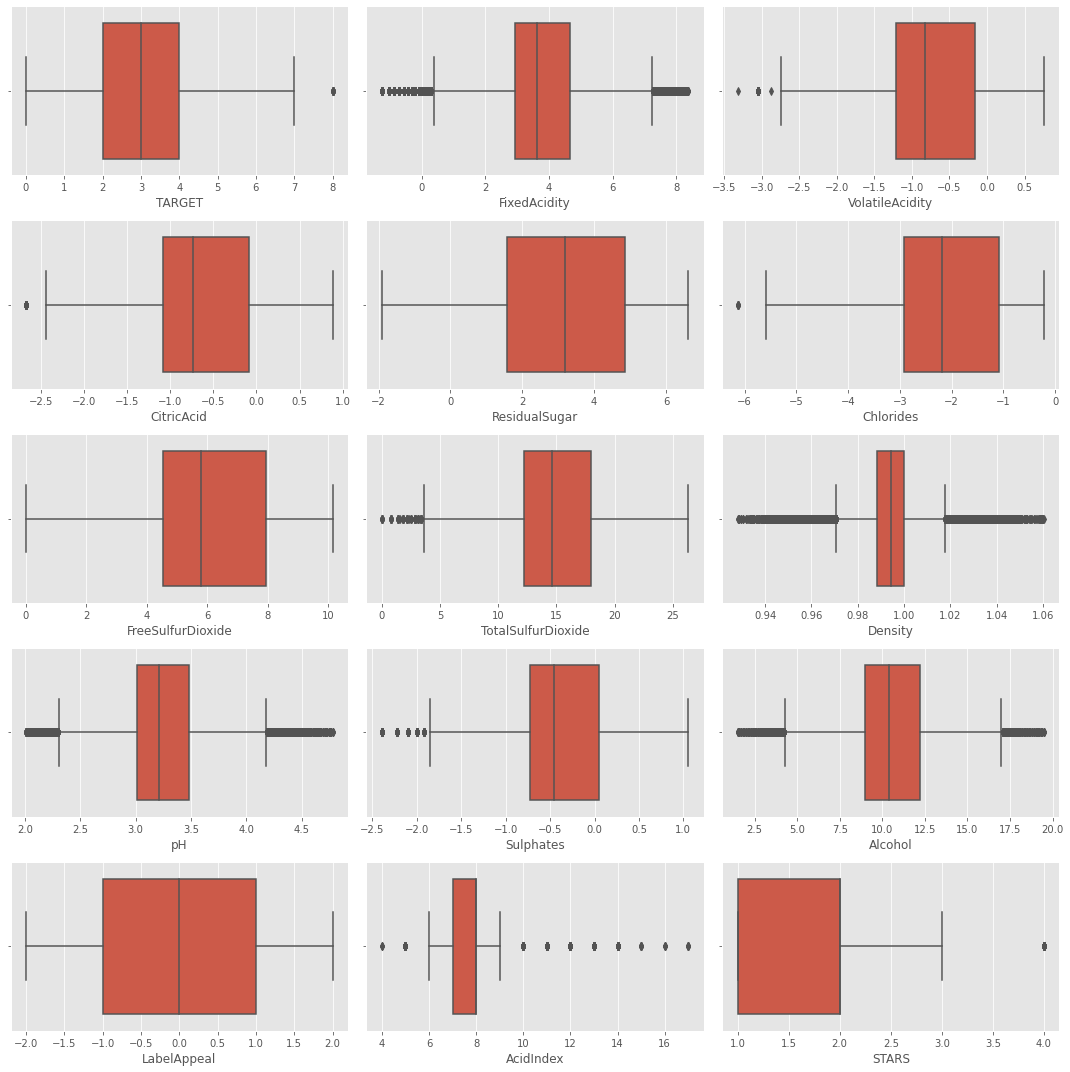

In [57]:
# boxplot visualization of each attribute
fig=plt.figure(figsize=(15,15))
for i in range(15):
    plt.subplot(5,3,i+1)
    sns.boxplot(df3[columns[i]])
    
plt.tight_layout()

Through our processing, We can see that the outliers have been significantly reduced, and all outliers over 2.5 standard deviations have been replaced.

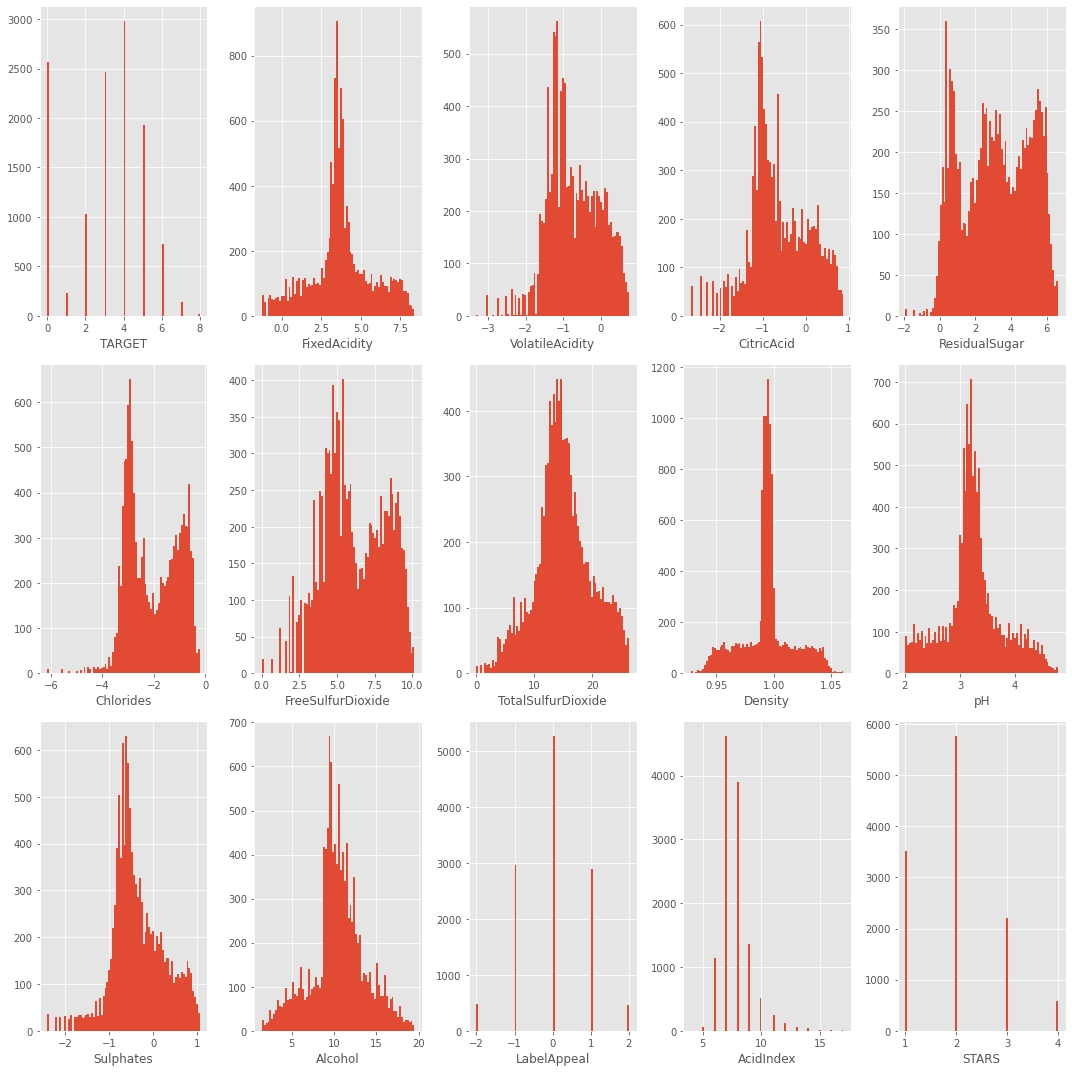

In [58]:
fig=plt.figure(figsize=(15,15))
for i in range(15):
    plt.subplot(3,5,i+1)
    df3[columns[i]].hist(bins=80)
    plt.xlabel(columns[i])
plt.tight_layout()

Accroding to the re-EDA we made, we can see that after box cox most of the attributes' outliers are less than before. And all attributes have been boxcox transformed are more normal distributed
Through our data preparation, we can find that some attributes that aren't nomarl distributions are more Gaussian in nature now, such as 'FixAcidity', 'TotalsulfurDioxide', 'Sulphates', etc. And 'STARS' is a categorical variable, so we use a bar plot for it below.

<AxesSubplot:title={'center':'Freq Dist of STARS'}, xlabel='STARS', ylabel='Count'>

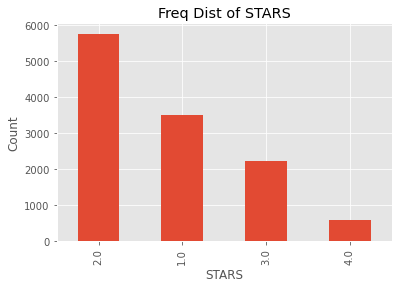

In [59]:
# freqency disribution of STARS attribute
bplt5 = df3['STARS'].value_counts().plot.bar(title = "Freq Dist of STARS")
plt.xlabel('STARS')
plt.ylabel('Count')
bplt5

Through imputing missing values, we can find that the overall situation of this attribute is basically unchanged, but the amount of data is more complete than before.

## Conclusion

This raw data set includes many attributes of wines, Through our EDA, we find some attributes have missing values, and some attributes are not in the normal distribution. So we use KNN to impute missing values, then use box cox to make those attributes more Gaussian in nature. At last, through rerun EDA, we find there is no missing value and all the attributes are more Gaussian in nature, which will benefit our future ML and Regression Analysis.